# CAO Points Analysis
### Conor McCaffrey

***



Give info about task

***

Give info about packages you are importing and why, with references

In [1]:
# Convenient HTTP requests.
import requests as rq

# Regular expressions.
import re

# Dates and times.
import datetime as dt

# Data frames. (dataframes is another way to say spreadsheets)
import pandas as pd

# For downloading.
import urllib.request as urlrq

import seaborn as sns

<br>

## 2021 Points

#### Please click below for 2021 courses
http://www.cao.ie/index.php?page=points&p=2021 [1]



Give overview here of response function (concise)

##### Steps to re-produce loading of Data in Pandas Dataframe

1. Use Requests library [] to make HTTP request to Python.
2. Using DateTime package to get current date and time [], create a filepath for data.
3. Rectify encoding error on dataset by setting to 'cp1252'.
4. Re-save Word Document for editing.
5. Save this rectifed HTML dataset.
6. Using regular expressions [], select the information we require from HTML file.
7. Loop through this file, using regular expression and save as a .csv file.
8. Read this .csv file into a Pandas dataframe
9. Call a method on the dataframe to ensure it is loaded correctly



##### Let's gather the Level 8 courses

In [2]:
# Fetch the CAO Level 8 points URL.  (based on Lecture Notes)
resp8 = rq.get('http://www2.cao.ie/points/l8.php')
# Have a quick look to ensure all is okay
resp8       # Response 200 means all is okay. 404 means not found

<Response [200]>

##### Let's gather the Level 7/6 courses

In [3]:
# Fetch the CAO Level 7/6 points URL (adapted from Lecture Notes)
resp7 = rq.get('http://www2.cao.ie/points/l76.php')
# Have a quick look to ensure all is okay
resp7      # Response 200 means all is okay. 404 means not found

<Response [200]>

<br>

## Save original dataset

In [4]:
# Get current date and time using Datetime Package (https://docs.python.org/3/library/datetime.html)
now = dt.datetime.now()

# Format as a string.
nowstr = now.strftime('%Y%m%d_%H%M%S')

In [5]:
# Create a filepath for original Level 8 data (https://automatetheboringstuff.com/chapter8/)
path8 = 'data/cao2021_Lvl8_' +  nowstr + '.html'
# Create a filepath for original Level 7/6 data
path7 = 'data/cao2021_Lvl76_' +  nowstr + '.html'

<br>

## So we have an error on server

***

Technically the server says we should decode as iso-8859

```
Content-Type: text/html; charset=iso-8859-1

```

However, one line uses \x96 which isnt defined in iso-8859-1. <br>
Therefore, we use the similar decoding standard cp1252 which is similar but also includes \x96.

In [6]:
## Level 8
# The server uses the wrong encoding, fix it
original_encoding = resp8.encoding
# Change it to cp1252
resp8.encoding = 'cp1252'

In [7]:
# Save the original HTML file
with open(path8, 'w') as f:
    f.write(resp8.text)

In [8]:
## Level 7/6
# The server uses the wrong encoding, fix it
original_encoding = resp7.encoding
# Change it to cp1252
resp7.encoding = 'cp1252'

In [9]:
# Save the original HTML file
with open(path7, 'w') as f:
    f.write(resp7.text)

# Use regular expressions to select lines we want

***

In [10]:
# Compile the regular expression for matching lines. (https://docs.python.org/3/library/re.html)
re_course = re.compile(r'([A-Z]{2}[0-9]{3})  (.*)([0-9]{3})(\*?) *') 


### Loop through the lines of the response

***

In [11]:
#The filepath for the csv file. Level 8

path8 = 'data/cao2021_Lvl8_' +  nowstr + '.csv'
# keep track of how many courses we process
no_lines = 0

# Open the csv file for writing.
try:
    with open (path8, 'w') as f:
        # Loop through the lines of the response.
        for line in resp8.iter_lines(): # took from google stack overflow.
        # Decode line, using the wrong encoding!
            dline = line.decode('cp1252')
        # match only the lines we want - the ones representing courses.
            if re_course.fullmatch(dline):    # getting set up for regular expression. 'pattern is the regular expression itself'
            # Add one to the lines counter
                no_lines = no_lines + 1
            # Uncomment next line to see the original
            #print(line)   # the .* is filler, can be basically anything. we are using it for the course name and spaces at end
            # Pick out the relevant parts of the matched line
                csv_version = re_course.sub(r'\1,\2,\3,\4', dline) # go in and one reg expres, what we want back isgroups of regular expression (/1 is first part, /2 is second part and so on. Reg exp above has 4 parts.)  
            # Print the CSV-style line
            #print(csv_version)
            # split the line on two or more spaces
                linesplit = re.split('  +', dline) # twos space and plus means two or more space
                #print(','.join(linesplit))
            # rejoin the substrings with commas in between.
                f.write(','.join(linesplit) + '\n')
except BaseException as err:
    print('This has caused an error')
else:
    print('Process has been successful.',f'Total number of lines is {no_lines}.')          




Process has been successful. Total number of lines is 922.


In [12]:
# Reading in csv file and converting to pandas daraframe (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)
df2021 = pd.read_csv('data/cao2021_Lvl8_20211101_201121.csv', sep=',') # consider making a table listing University and the letters for it

In [13]:
# lets ensure it calls out correctly
df2021

,Course Code,Course,RND 1,RND 2
0,AL801,Software Design for Virtual Reality and Gaming,300,NaN
1,AL802,Software Design in Artificial Intelligence for...,313,NaN
2,AL803,Software Design for Mobile Apps and Connected ...,350,NaN
3,AL805,Computer Engineering for Network Infrastructure,321,NaN
4,AL810,Quantity Surveying,328,NaN
...,...,...,...,...
917,WD211,Creative Computing,270,NaN
918,WD212,Recreation and Sport Management,262,NaN
919,WD230,Mechanical and Manufacturing Engineering,230,230
920,WD231,Early Childhood Care and Education,266,NaN


In [14]:
#The filepath for the csv file.

path7 = 'data/cao2021_Lvl76_' +  nowstr + '.csv'
# keep track of how many courses we process
no_lines = 0

# Open the csv file for writing.
try:
    with open (path7, 'w') as f:
        # Loop through the lines of the response.
        for line in resp7.iter_lines(): # took from google stack overflow.
            # Decode line, using the wrong encoding!
            dline = line.decode('cp1252')
            # match only the lines we want - the ones representing courses.
            if re_course.fullmatch(dline):    # getting set up for regular expression. 'pattern is the regular expression itself'
                # Add one to the lines counter
                no_lines = no_lines + 1
                #Uncomment next line to see the original
                #print(line)   # the .* is filler, can be basically anything. we are using it for the course name and spaces at end
                # Pick out the relevant parts of the matched line
                csv_version = re_course.sub(r'\1,\2,\3,\4', dline) # go in and one reg expres, what we want back is groups of regular expression (/1 is first part, /2 is second part and so on. Reg exp above has 4 parts.)  
                # Print the CSV-style line
                #print(csv_version)
                # split the line on two or more spaces
                linesplit = re.split('  +', dline) # twos space and plus means two or more space
                #print(','.join(linesplit))
                # rejoin the substrings with commas in between.
                f.write(','.join(linesplit) + '\n')
except BaseException as err:
    print('This has caused an error')
else:
    print('Process has been successful.',f'Total number of lines is {no_lines}.')    

Process has been successful. Total number of lines is 390.


In [15]:
# Reading in csv file and converting to pandas daraframe (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)
df2021_7 = pd.read_csv('data/cao2021_Lvl76_20211101_205701.csv', sep=',') # consider making a table listing University and the letters for it

In [16]:
# lets ensure it calls out correctly
df2021_7

,Course Code,Course,RND 1,RND 2
0,AL605,Music and Instrument Technology,211,NaN
1,AL630,Pharmacy Technician,308,NaN
2,AL631,Dental Nursing,311,NaN
3,AL632,Applied Science,297,NaN
4,AL701,Computer Engineering for Network Infrastructure,207,NaN
...,...,...,...,...
385,WD184,Retail Management,190,NaN
386,WD188,Applied Health Care,220,NaN
387,WD206,Electronic Engineering,180,NaN
388,WD207,Mechanical Engineering,172,NaN


<br>

## 2020 Points

#### Please click below for 2021 courses
http://www.cao.ie/index.php?page=points&p=2020

***





##### Steps to re-produce loading of Data in Pandas Dataframe

1. Using DateTime package, create filepath for data in excel format.
2. Save this file to disk using 'path' variable and url requests (https://docs.python.org/3/library/urllib.request.html).
3. Read dtaa into Pandas Dataframe, using skiprows to remove unecessary data.
4. Spot check the data to ensure it has all transferred correctly.
5. Creat filepath for dataframe in excel .csv format.
6. Save Pandas dataframe to disk.


<br>

### Save Original Dataset

***

#### Let's gather the Data

In [17]:
# Create a filepath for original data. 
path = 'data/cao2020_' +  nowstr + '.xlsx'

In [18]:
# Save original file to disk.
urlrq.urlretrieve('http://www2.cao.ie/points/CAOPointsCharts2020.xlsx', path) 

('data/cao2020_20211102_221221.xlsx',
 <http.client.HTTPMessage at 0x1d890040670>)

<br>

#### Load Spreadsheet using Pandas

***

In [19]:
# Download and parse the excel spreadsheet
# Read excel function turnsnit into a dataframe in memory so we are now dealing with pandas df from here on
df2020 = pd.read_excel('http://www2.cao.ie/points/CAOPointsCharts2020.xlsx', skiprows = 10) # pandas dataframe

In [20]:
df2020

,CATEGORY (i.e.ISCED description),COURSE TITLE,COURSE CODE2,R1 POINTS,R1 Random *,R2 POINTS,R2 Random*,EOS,EOS Random *,EOS Mid-point,...,avp,v,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8
0,Business and administration,International Business,AC120,209,NaN,NaN,NaN,209,NaN,280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Humanities (except languages),Liberal Arts,AC137,252,NaN,NaN,NaN,252,NaN,270,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arts,"First Year Art & Design (Common Entry,portfolio)",AD101,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arts,Graphic Design and Moving Image Design (portfo...,AD102,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arts,Textile & Surface Design and Jewellery & Objec...,AD103,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,Manufacturing and processing,Manufacturing Engineering,WD208,188,NaN,NaN,NaN,188,NaN,339,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1460,Information and Communication Technologies (ICTs),Software Systems Development,WD210,279,NaN,NaN,NaN,279,NaN,337,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1461,Information and Communication Technologies (ICTs),Creative Computing,WD211,271,NaN,NaN,NaN,271,NaN,318,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1462,Personal services,Recreation and Sport Management,WD212,270,NaN,NaN,NaN,270,NaN,349,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df2020.iloc[753] # in Pandas, iloc gets i-location (row location). loc works for name. Spot check, random row

CATEGORY (i.e.ISCED description)          Engineering and engineering trades
COURSE TITLE                        Road Transport Technology and Management
COURSE CODE2                                                           LC286
R1 POINTS                                                                264
R1 Random *                                                              NaN
R2 POINTS                                                                NaN
R2 Random*                                                               NaN
EOS                                                                      264
EOS Random *                                                             NaN
EOS Mid-point                                                            360
LEVEL                                                                      7
HEI                                         Limerick Institute of Technology
Test/Interview #                                                         NaN

In [22]:
df2020.iloc[1463]  # checking final row. A -1 would work as well (slicing) Spot check, final row

CATEGORY (i.e.ISCED description)          Engineering and engineering trades
COURSE TITLE                        Mechanical and Manufacturing Engineering
COURSE CODE2                                                           WD230
R1 POINTS                                                                253
R1 Random *                                                              NaN
R2 POINTS                                                                NaN
R2 Random*                                                               NaN
EOS                                                                      253
EOS Random *                                                             NaN
EOS Mid-point                                                            369
LEVEL                                                                      8
HEI                                        Waterford Institute of Technology
Test/Interview #                                                         NaN

In [23]:
# Create a filepath for the Pandas data
path = 'data/cao2020_' +  nowstr + '.csv'

In [24]:
# Save Pandas dataframe to disk. Look up to_csv to get rid of row index
df2020.to_csv(path)

In [25]:
df2020

,CATEGORY (i.e.ISCED description),COURSE TITLE,COURSE CODE2,R1 POINTS,R1 Random *,R2 POINTS,R2 Random*,EOS,EOS Random *,EOS Mid-point,...,avp,v,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8
0,Business and administration,International Business,AC120,209,NaN,NaN,NaN,209,NaN,280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Humanities (except languages),Liberal Arts,AC137,252,NaN,NaN,NaN,252,NaN,270,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arts,"First Year Art & Design (Common Entry,portfolio)",AD101,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arts,Graphic Design and Moving Image Design (portfo...,AD102,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arts,Textile & Surface Design and Jewellery & Objec...,AD103,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,Manufacturing and processing,Manufacturing Engineering,WD208,188,NaN,NaN,NaN,188,NaN,339,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1460,Information and Communication Technologies (ICTs),Software Systems Development,WD210,279,NaN,NaN,NaN,279,NaN,337,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1461,Information and Communication Technologies (ICTs),Creative Computing,WD211,271,NaN,NaN,NaN,271,NaN,318,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1462,Personal services,Recreation and Sport Management,WD212,270,NaN,NaN,NaN,270,NaN,349,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<br>

Dont forget Level 7/6 points
Camelot or tabula-py (depends on Java)

## 2019 Points

http://www.cao.ie/index.php?page=points&p=2019

***

##### Steps to re-produce 

1. Download original PDF file.
2. Open original PDF file in Microsoft Word.
3. Save Microsoft Word's converted PDF in docx format.
4. Re-save Word Document for editing.
5. Delete Headers and Footers.
6. Delete preamble on Page 1.
7. Select all and copy.
8. Paste into Notepad ++.
9. Remove HEI name headings and paste onto each course line.
10. Delete blank lines.
11. Replace double tab characters with a single tab character (6 occurences)
12. Deleted tab characters at end of lines
13. Change backticks to apostrophes

In [26]:
df2019 = pd.read_csv('data/cao2019_20211031_184506.csv', sep = '\t') # consider making a table listing University and the letters for it
# then merge dataframes that linked course codes to HEIs

In [27]:
df2019

,Course Code,Course,EOS,Mid
0,AL801,Software Design with Virtual Reality and Gaming,304,328.0
1,AL802,Software Design with Cloud Computing,301,306.0
2,AL803,Software Design with Mobile Apps and Connected...,309,337.0
3,AL805,Network Management and Cloud Infrastructure,329,442.0
4,AL810,Quantity Surveying,307,349.0
...,...,...,...,...
925,WD200,Arts (options),221,296.0
926,WD210,Software Systems Development,271,329.0
927,WD211,Creative Computing,275,322.0
928,WD212,Recreation and Sport Management,274,311.0


In [28]:
df2019_l7 = pd.read_csv('data/cao2019_20211101_221930_edited.CSV', sep = '\t') # consider making a table listing University and the letters for it
# then merge dataframes that linked course codes to HEIs

In [29]:
df2019_l7.head()

,Course Code,Course,EOS,Mid
0,AL600,Software Design,205,306.0
1,AL601,Computer Engineering,196,272.0
2,AL602,Mechanical Engineering,258,424.0
3,AL604,Civil Engineering,252,360.0
4,AL630,Pharmacy Technician,306,366.0


## Analysis of CAO 2021 Level 8,7,6 Points


In [30]:
#Lets first understand the basic information about this Level 8 data
df2021.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 922 entries, 0 to 921
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Course Code  922 non-null    object
 1   Course       922 non-null    object
 2   RND 1        920 non-null    object
 3   RND 2        254 non-null    object
dtypes: object(4)
memory usage: 28.9+ KB


In [31]:
#shape can be used to get the shape of dataframe
#columns gives us the list of columns in the dataframe

df2021.describe()


,Course Code,Course,RND 1,RND 2
count,922,922,920,254
unique,922,690,371,178
top,GY402,Business,300,613*
freq,1,12,18,5


In [32]:
genre = df2021['Course Code']
genre

0      AL801
1      AL802
2      AL803
3      AL805
4      AL810
       ...  
917    WD211
918    WD212
919    WD230
920    WD231
921    WD232
Name: Course Code, Length: 922, dtype: object

In [53]:
# Extract data as dataframe
genr = df2021[['RND 1']]
genr
type('genr')

str

In [54]:
df2021['RND 1'] = df2021['RND 1'].str.replace('*', '')
df2021['RND 1'] = df2021['RND 1'].str.replace('#', '')


AttributeError: Can only use .str accessor with string values!

In [55]:
df2021['RND 2'] = df2021['RND 2'].str.replace('*', '')
df2021['RND 2'] = df2021['RND 2'].str.replace('#', '')

<ipython-input-55-6a23578c5e33>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df2021['RND 2'] = df2021['RND 2'].str.replace('*', '')


In [56]:
df2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 922 entries, 0 to 921
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Course Code  922 non-null    object 
 1   Course       922 non-null    object 
 2   RND 1        920 non-null    float64
 3   RND 2        254 non-null    object 
dtypes: float64(1), object(3)
memory usage: 28.9+ KB


In [57]:
df2021.iloc[8] 

Course Code           AL835
Course         Pharmacology
RND 1                 356.0
RND 2                   NaN
Name: 8, dtype: object

In [58]:
df2021['RND 1'] = df2021['RND 1'].astype(float)
df2021['RND 2'] = df2021['RND 2'].astype(float)

In [59]:
df2021.iloc[8] 

Course Code           AL835
Course         Pharmacology
RND 1                 356.0
RND 2                   NaN
Name: 8, dtype: object

In [60]:
df2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 922 entries, 0 to 921
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Course Code  922 non-null    object 
 1   Course       922 non-null    object 
 2   RND 1        920 non-null    float64
 3   RND 2        254 non-null    float64
dtypes: float64(2), object(2)
memory usage: 28.9+ KB


<AxesSubplot:xlabel='Course'>

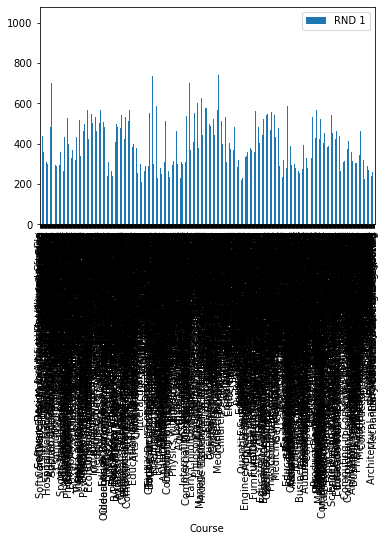

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
  
df2021 = pd.DataFrame(df2021,columns=['Course','RND 1'])
df2021.plot(x ='Course', y='RND 1', kind = 'bar')
# Lets consider splitting this into college. Then compare points ranges. The compare college locations. 
# Find out how to select subsets as well.
# Points are for plotting and showing panadas functionality

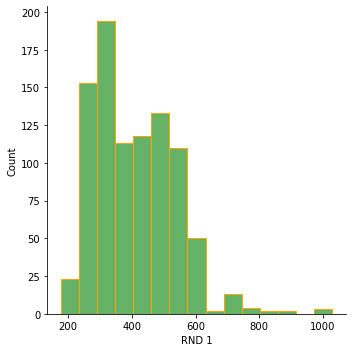

In [42]:
sns.displot(df2021['RND 1'], kde= False, bins = 15, color = 'green', edgecolor = 'orange', alpha=0.6)